# Skill Co-Occurrence Analysis

## Setup and Load Data

In [ ]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from collections import Counter
import ast


In [ ]:
df = pd.read_csv("/content/combined_with_skills_norm_v1.csv")


### Parse Skills

In [ ]:
def parse_skills(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    return []

df["skills_norm"] = df["skills_norm"].apply(parse_skills)


### Filter Rows

In [ ]:
df = df[df["skills_norm"].apply(len) > 1]
df.shape


(23553, 15)

## Generate Skill Pairs
### Creating unordered skill pairs per job

In [ ]:
skill_pairs = []

for skills in df["skills_norm"]:
    unique_skills = sorted(set(skills))
    pairs = itertools.combinations(unique_skills, 2)
    skill_pairs.extend(pairs)


### Count Co-occurences

In [ ]:
pair_counts = Counter(skill_pairs)


### Convert to Dataframe

In [ ]:
pair_df = (
    pd.DataFrame(pair_counts.items(), columns=["skill_pair", "count"])
      .sort_values("count", ascending=False)
      .reset_index(drop=True)
)


### Split pairs into columns

In [ ]:
pair_df[["skill_1", "skill_2"]] = pd.DataFrame(
    pair_df["skill_pair"].tolist(),
    index=pair_df.index
)

pair_df = pair_df.drop(columns="skill_pair")
pair_df.head(10)


,count,skill_1,skill_2
0,7668,aws,excel
1,5086,excel,git
2,3614,aws,git
3,2499,python,sql
4,2128,java,sql
5,1955,aws,python
6,1921,excel,sql
7,1891,java,python
8,1863,git,sql
9,1840,aws,sql


## Plot Top 20 Pairs

### Prepare Data

In [ ]:
top20 = pair_df.head(20)
labels = top20["skill_1"] + " + " + top20["skill_2"]


### Bar Chart

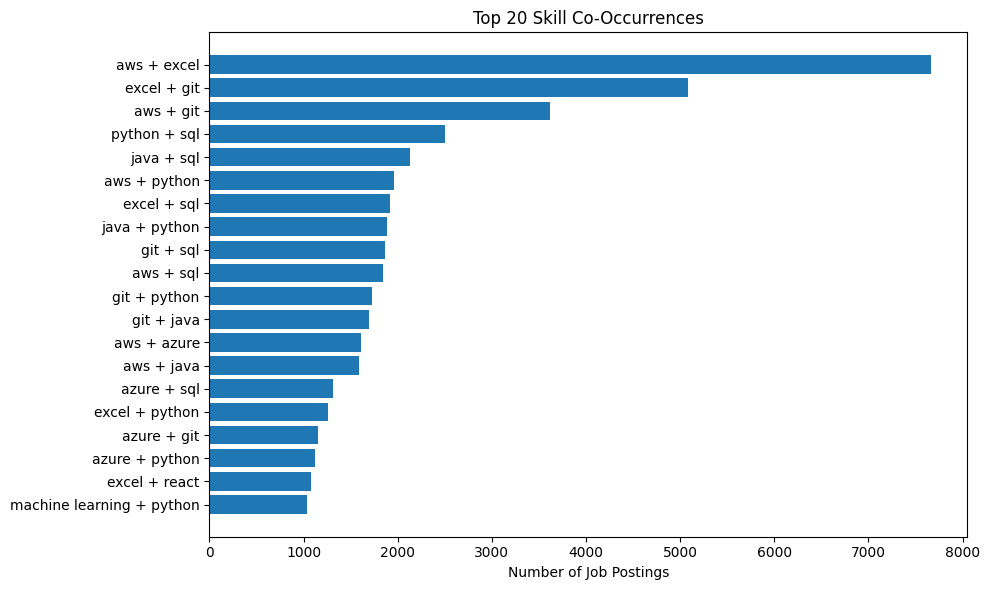

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(labels[::-1], top20["count"][::-1])
plt.xlabel("Number of Job Postings")
plt.title("Top 20 Skill Co-Occurrences")
plt.tight_layout()
plt.savefig("top_20_skill_pairs.png", bbox_inches="tight")
plt.show()


## Interpretation

This analysis examines which technical skills most frequently appear together in job postings, revealing common skill combinations employers expect from candidates.

The results show that cloud, version control, and core data/programming skills frequently co-occur:

- AWS + Excel and Excel + Git dominate, indicating strong demand for roles combining cloud exposure, data handling, and collaboration workflows.

- Pairs such as Python + SQL, Java + SQL, and AWS + Python highlight the prevalence of backend and data-oriented roles.

- Frequent combinations involving Git suggest that version control is a near-universal requirement across technical roles.

- The appearance of Azure-related pairs alongside AWS indicates multi-cloud expectations rather than single-platform specialization.

Overall, this suggests that employers value skill stacks, not isolated skills. Candidates with complementary combinations (e.g., programming + databases + cloud + tooling) are better aligned with market demand than those focusing on a single technology

#### This analysis reflects frequency of co-occurrence, not salary impact or seniority level.